# Init

In [1]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['patch.linewidth'] = 1.5

Welcome to JupyROOT 6.12/04


In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.__file__)
print(pd.__version__)
print(pd.__file__)

2.1.0
/cvmfs/sft.cern.ch/lcg/views/LCG_92python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/__init__.py
0.21.0
/cvmfs/sft.cern.ch/lcg/views/LCG_92python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/pandas/__init__.py


In [3]:
def extract_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    ROOT.gPad.Update()
    
    tot = eff.GetTotalHistogram()
    nBins = tot.GetNbinsX()
    xx = []
    yy = []
    yl = []
    yu = []
    for i in range(1, nBins+1):
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 0 and eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)) == 1.: continue
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 1. and eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)) == 1.: continue
        
        xx.append(tot.GetXaxis().GetBinCenter(i))
        yy.append(eff.GetEfficiency(eff.GetGlobalBin(i)))
        yl.append(eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)))
        yu.append(eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)))
                  
    
    return {'x': np.array(xx),
            'y': np.array(yy),
            'yerr': np.array([yl, yu])}

# Data input

In [6]:
# tree = uproot.open('../Firefighter/washAOD/test/SIDMmumu_Mps-200_MZp-1p2_ctau-1p2_100k.root')['RECO_muTrackEffi/recoEffiForMuTrack']
# df = tree.pandas.df()

Mchi = '60'
dMchi = '20'

dfs_dsa = OrderedDict()
dfs_dsa[1] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1.root' % (Mchi,dMchi))['RECO_dsa/recoEffiForMuTrack'].pandas.df()
dfs_dsa[10] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-10.root' % (Mchi,dMchi))['RECO_dsa/recoEffiForMuTrack'].pandas.df()
dfs_dsa[100] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-100.root' % (Mchi,dMchi))['RECO_dsa/recoEffiForMuTrack'].pandas.df()
dfs_dsa[1000] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1000.root' % (Mchi,dMchi))['RECO_dsa/recoEffiForMuTrack'].pandas.df()

dfs_dgm = OrderedDict()
dfs_dgm[1] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1.root' % (Mchi,dMchi))['RECO_dgm/recoEffiForMuTrack'].pandas.df()
dfs_dgm[10] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-10.root' % (Mchi,dMchi))['RECO_dgm/recoEffiForMuTrack'].pandas.df()
dfs_dgm[100] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-100.root' % (Mchi,dMchi))['RECO_dgm/recoEffiForMuTrack'].pandas.df()
dfs_dgm[1000] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1000.root' % (Mchi,dMchi))['RECO_dgm/recoEffiForMuTrack'].pandas.df()

dfs_rsa = OrderedDict()
dfs_rsa[1] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1.root' % (Mchi,dMchi))['RECO_rsa/recoEffiForMuTrack'].pandas.df()
dfs_rsa[10] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-10.root' % (Mchi,dMchi))['RECO_rsa/recoEffiForMuTrack'].pandas.df()
dfs_rsa[100] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-100.root' % (Mchi,dMchi))['RECO_rsa/recoEffiForMuTrack'].pandas.df()
dfs_rsa[1000] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1000.root' % (Mchi,dMchi))['RECO_rsa/recoEffiForMuTrack'].pandas.df()

dfs_gbm = OrderedDict()
dfs_gbm[1] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1.root' % (Mchi,dMchi))['RECO_gbm/recoEffiForMuTrack'].pandas.df()
dfs_gbm[10] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-10.root' % (Mchi,dMchi))['RECO_gbm/recoEffiForMuTrack'].pandas.df()
dfs_gbm[100] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-100.root' % (Mchi,dMchi))['RECO_gbm/recoEffiForMuTrack'].pandas.df()
dfs_gbm[1000] = uproot.open('../Firefighter/washAOD/muon_reco_studies/Mchi-%s_dMchi-%s_ctau-1000.root' % (Mchi,dMchi))['RECO_gbm/recoEffiForMuTrack'].pandas.df()

In [8]:
for k, df in dfs_dsa.items():
    df.columns = [x.decode() for x in df.columns]
    
for k, df in dfs_dgm.items():
    df.columns = [x.decode() for x in df.columns]

for k, df in dfs_rsa.items():
    df.columns = [x.decode() for x in df.columns]
    
for k, df in dfs_gbm.items():
    df.columns = [x.decode() for x in df.columns]

AttributeError: 'str' object has no attribute 'decode'

In [7]:
dfs_dsa[10]

nMatched      genPt    genEta    genPhi    genVxy     genVz  \
entry subentry                                                                
0     0              2.0  14.040090  0.142282 -2.173211  0.599428  1.486007   
      1              NaN  14.139590 -0.215063 -1.456864  0.599428  1.486007   
1     0              2.0  12.607132 -2.210337 -1.527808  0.002981 -7.385312   
      1              NaN  17.215792 -2.040707 -1.742509  0.002981 -7.385312   
2     0              2.0  13.858829  1.431589  1.590926  0.123030 -7.192831   
      1              NaN  10.614110  1.808367  1.641949  0.123030 -7.192831   
3     0              2.0   7.927187 -1.648160 -2.052086  0.067029  4.917501   
      1              NaN   9.137482 -0.256925 -1.913902  0.067029  4.917501   
4     0              2.0  33.095783  0.884533  2.937788  1.270777  4.123187   
      1              NaN  13.197873  0.743089  2.930853  1.270777  4.123187   
5     0              1.0   7.573322 -2.086073 -2.407721  0.288826 -1.750458   
      1              NaN   3.812738 -0.367605  1.149229  0.288826 -1.750458   
6     0              2.0  15.128087 -1.718217 -2.904552  0.333738  2.205900   
      1              NaN   8.730264 -1.221963  3.129300  0.333738  2.205900   
7     0              1.0  18.940264 -0.645507  1.857965  0.106274 -2.035819   
      1              NaN   2.081670  0.730029  1.086700  0.106274 -2.035819   
8     0              1.0  19.950092  0.897822  2.930346  0.263184  2.723052   
      1              NaN   2.282216  0.386188 -2.596443  0.263184  2.723052   
9     0              2.0  14.743015 -0.016449  1.747725  0.725664  0.582124   
      1              NaN  16.672859 -1.029497  1.670911  0.725664  0.582124   
10    0              2.0   5.665511  0.542730  2.706827  0.500171  3.450105   
      1              NaN  13.943298  0.811134  3.034315  0.500171  3.450105   
11    0              1.0  22.950129  1.181203 -1.359215  3.273201  4.678844   
      1              NaN   3.633802 -0.224572 -0.312210  3.273201  4.678844   
12    0              2.0   3.929692 -1.149444  1.785463  0.975651  0.720563   
      1              NaN   4.683098  0.135189  0.048523  0.975651  0.720563   
13    0              2.0   9.543148 -0.097389  1.299573  0.071770 -4.950905   
      1              NaN  10.325174 -0.610322  0.370578  0.071770 -4.950905   
14    0              2.0   5.991403 -0.454050  2.331763  1.414991 -2.545515   
      1              NaN  11.059587 -0.655783  2.809175  1.414991 -2.545515   
...                  ...        ...       ...       ...       ...       ...   
25283 0              2.0  13.485362 -0.162897  1.327798  0.879915 -1.269058   
      1              NaN  11.072146 -0.880020  1.089860  0.879915 -1.269058   
25284 0              2.0   6.460658 -0.182393 -3.038295  0.137634 -1.449220   
      1              NaN   8.573329 -0.723955  0.852541  0.137634 -1.449220   
25285 0              2.0   6.930273  1.849522  0.536240  0.167938 -2.783818   
      1              NaN   5.476152  1.865705  2.178483  0.167938 -2.783818   
25286 0              2.0  12.978848  0.286137 -1.015799  0.429729 -0.931269   
      1              NaN   4.911077  0.573603 -1.679560  0.429729 -0.931269   
25287 0              2.0   9.941556  0.089285  2.306706  0.518629 -1.352464   
      1              NaN   9.957986 -0.259782  1.385712  0.518629 -1.352464   
25288 0              1.0   6.066146 -0.813125 -0.325277  0.070261 -2.282201   
      1              NaN   2.962634  0.957890  2.702667  0.070261 -2.282201   
25289 0              2.0   3.670047  1.219299 -0.426612  2.472722  9.010139   
      1              NaN   8.825240  0.474773 -0.366365  2.472722  9.010139   
25290 0              2.0   9.232150 -0.379248  1.911356  0.313494  5.345464   
      1              NaN  10.126681  0.552029  1.974031  0.313494  5.345464   
25291 0              2.0  13.566456 -2.059430 -0.113879  0.394328 -8.519150   
      1              NaN  11.076205 -1.855148  0.135926  0.394328 

# Number of muons

Algorithm: dSA, lifetime 1: 0.714868 counts
Algorithm: dSA, lifetime 10: 0.721006 counts
Algorithm: dSA, lifetime 100: 0.710520 counts
Algorithm: dSA, lifetime 1000: 0.601934 counts
Algorithm: gBM, lifetime 1: 0.762555 counts
Algorithm: gBM, lifetime 10: 0.740256 counts
Algorithm: gBM, lifetime 100: 0.481715 counts
Algorithm: gBM, lifetime 1000: 0.119395 counts
Algorithm: rSA, lifetime 1: 0.632203 counts
Algorithm: rSA, lifetime 10: 0.637402 counts
Algorithm: rSA, lifetime 100: 0.621032 counts
Algorithm: rSA, lifetime 1000: 0.465058 counts
Algorithm: dGM, lifetime 1: 0.762086 counts
Algorithm: dGM, lifetime 10: 0.734722 counts
Algorithm: dGM, lifetime 100: 0.490580 counts
Algorithm: dGM, lifetime 1000: 0.128156 counts


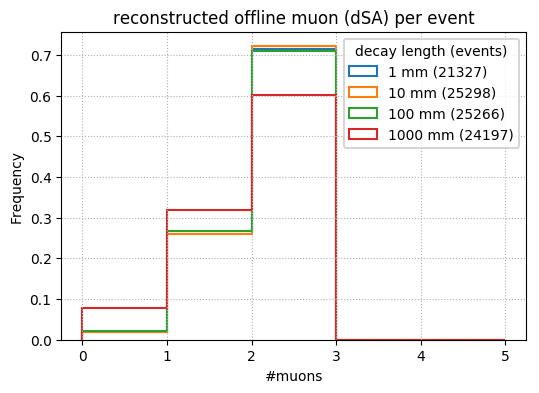

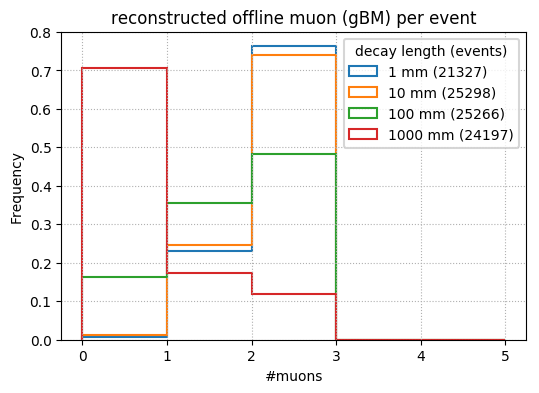

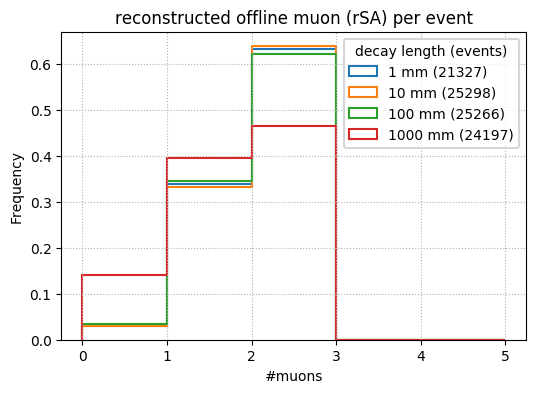

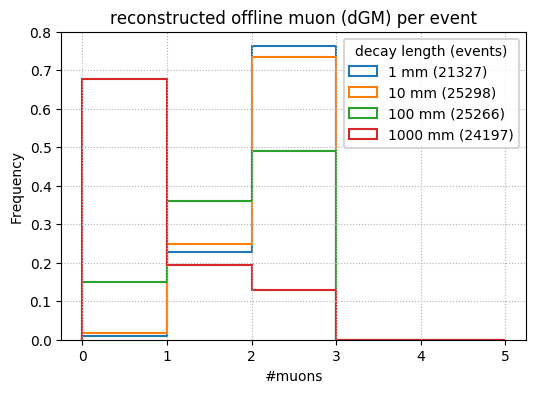

In [9]:
def make_num_muon_plot(collection, name):

    fig, ax = plt.subplots(figsize=(6,4))

    nevents = {}
    for k, df in collection.items():
        nevents[k] = len(df['nMatched'].dropna())
        df['nMatched'].plot.hist(bins=5, range=(0,5), ax=ax, label='%d mm (%d)' % (k, nevents[k]), histtype='step', density=True)
        counts, binedges = np.histogram(df['nMatched'].dropna(), bins=5, range=(0,5), density=True)
        print("Algorithm: %s, lifetime %d: %f counts" % (name, k, counts[2]))

    ax.set_xlabel('#muons')
    ax.grid()
    plt.title('reconstructed offline muon (%s) per event' % name)
    plt.legend(loc='upper right', title='decay length (events)')
    pd.Series(nevents)
    #plt.savefig("Mchi-%s_dMchi-%s/num_muons_%s.pdf" % (Mchi, dMchi, name.lower()))

make_num_muon_plot(dfs_dsa, "dSA")
make_num_muon_plot(dfs_gbm, "gBM")
make_num_muon_plot(dfs_rsa, "rSA")
make_num_muon_plot(dfs_dgm, "dGM")

# Comparison, reconstructed vs gen-level

In [ ]:
def make_all_comp_plots(collection, name):

    fig, ax = plt.subplots(2,3, figsize=(18,8))
    fig.suptitle('muon (%s) gen vs reconstructed (10 mm) (normalized)' % name, y=0.94)

    df = collection[10]

    recoDf = df[['genPt','genEta','genPhi', 'genVxy', 'genVz', 'genDr', 'recoPt']].dropna()

    df['genPt']    .plot.hist(bins=50, range=(0,140), ax=ax[0,0], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genPt'].plot.hist(bins=50, range=(0,140), ax=ax[0,0], label='recoed', logy=True, density=True, alpha=0.5)
    ax[0, 0].set_xlabel('pT [GeV]')

    df['genEta']    .plot.hist(bins=50, range=(-2.4,2.4), ax=ax[0,1], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genEta'].plot.hist(bins=50, range=(-2.4,2.4), ax=ax[0,1], label='recoed', logy=True, density=True, alpha=0.5)
    ax[0, 1].set_xlabel('eta')
    ax[0, 1].set_yticks([0.1,1])

    df['genPhi']    .plot.hist(bins=50, ax=ax[0,2], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genPhi'].plot.hist(bins=50, ax=ax[0,2], label='recoed', logy=True, density=True, alpha=0.5)
    ax[0, 2].set_xlabel('phi')
    ax[0, 2].set_yticks([0.01,0.1])

    df['genVxy']    .plot.hist(bins=50, ax=ax[1,0], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genVxy'].plot.hist(bins=50, ax=ax[1,0], label='recoed', logy=True, density=True, alpha=0.5)
    ax[1, 0].set_xlabel('Vxy')

    df['genVz']    .plot.hist(bins=50, ax=ax[1,1], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genVz'].plot.hist(bins=50, ax=ax[1,1], label='recoed', logy=True, density=True, alpha=0.5)
    ax[1, 1].set_xlabel('Vz')

    df['genDr']    .plot.hist(bins=50, ax=ax[1,2], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genDr'].plot.hist(bins=50, ax=ax[1,2], label='recoed', logy=True, density=True, alpha=0.5)
    ax[1, 2].set_xlabel('dR')

    for a in ax:
        for b in a:
            b.legend(loc='best')
            b.grid()

    #plt.savefig("Mchi-%s_dMchi-%s/all_comp_10mm_%s.pdf" % (Mchi, dMchi, name.lower()))
    
make_all_comp_plots(dfs_dsa, "dSA")
make_all_comp_plots(dfs_gbm, "gBM")
make_all_comp_plots(dfs_rsa, "rSA")
make_all_comp_plots(dfs_dgm, "dGM")

# Efficiency plots

In [9]:
import scipy.special
from scipy.optimize import curve_fit, fsolve
def func(z,p0,p1,p2,p3):
    return p2 + p3*scipy.special.erf((z-p0)/p1)
def func2(z, p0, p1, p2, p3, p4):
    return func(z, p0, p1, p2, p3) - p4*0.98

In [17]:
def make_plot(ax, k, df, recodf, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F('h0_%d' % k, '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F('h1_%d' % k, '', nbins, binIni, binEnd)
    for x in df[variable]: h0.Fill(x)
    for x in recodf[variable]: h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label='%d mm' % k, markersize=3)
        
def make_plot_fit(ax, k, df, recodf, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F('h0_%d' % k, '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F('h1_%d' % k, '', nbins, binIni, binEnd)
    for x in df[variable]: h0.Fill(x)
    for x in recodf[variable]: h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt=all_colors[k]+'o', label='%d mm' % k, markersize=3, alpha=0.3)
    if variable == 'genPt':
        popt, pcov = curve_fit(func, data['x'][0:80], data['y'][0:80])
        percentile98 = fsolve(func2, 3, (popt[0], popt[1], popt[2], popt[3], popt[2]+popt[3]))
        ax.plot(data['x'][0:80], func(data['x'][0:80], *popt),  \
                label='max. = %5.2f, pT @ 98%% = %5.2f' % ((popt[2]+popt[3]), percentile98[0]))

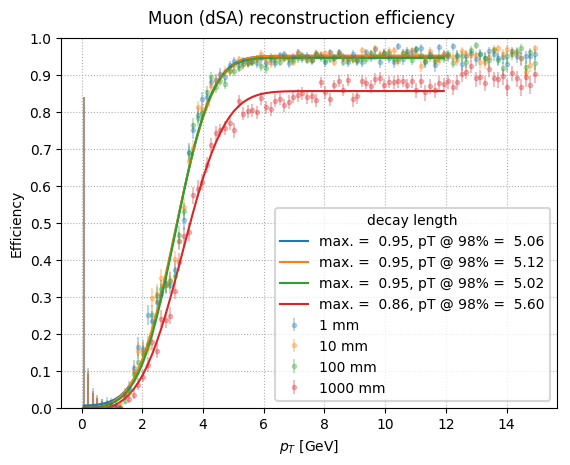

In [21]:
name = "dSA"
collection = dfs_dsa

fig,axes = plt.subplots()
fig.suptitle('Muon (%s) reconstruction efficiency' % name, y=0.94)

all_mins = [0]
all_maxs = [15]
all_vars = ['genPt','recoPt']
all_xlabels = ['$p_{T}$ [GeV]']
all_colors = {1:'C0', 10:'C1', 100:'C2', 1000:'C3'}

for i,ax in enumerate(fig.axes):
    curr_var = all_vars[i]
    for k, df in collection.items():
        recoDf = df[all_vars].dropna()
        make_plot_fit(ax, k, df, recoDf, curr_var, 100, all_mins[i], all_maxs[i])

    ax.set_xlabel(all_xlabels[i])
    ax.set_ylabel('Efficiency')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_ylim((0,1))
    ax.legend(loc='best', title='decay length')
    ax.grid()

    #plt.savefig("Mchi-%s_dMchi-%s/pt_eff_fit_%s.pdf" % (Mchi, dMchi, name.lower()))

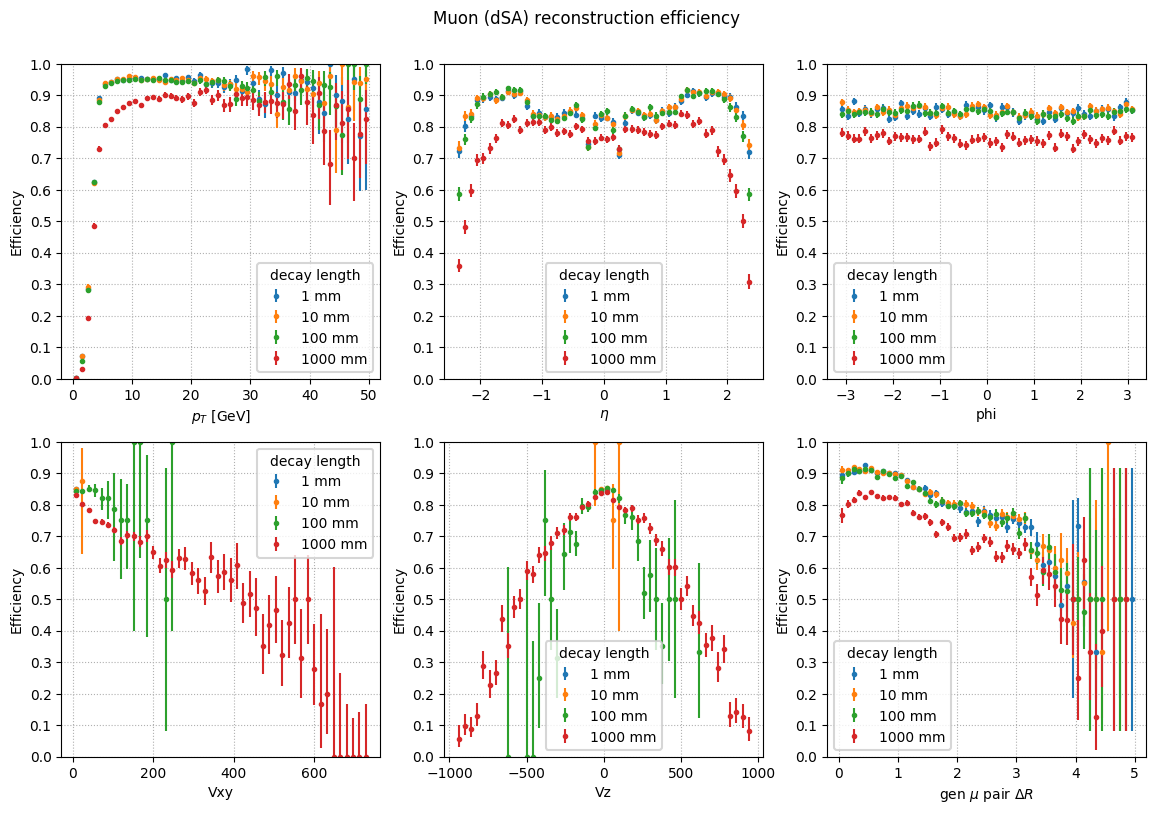

In [22]:
name = "dSA"
collection = dfs_dsa

fig,axes = plt.subplots(2,3, figsize=(14,9))
fig.suptitle('Muon (%s) reconstruction efficiency' % name, y=0.94)

all_mins = [0,-2.5,-3.15,0,-1000,0]
all_maxs = [50,2.5,3.15,800,1000,5]
all_vars = ['genPt', 'genEta', 'genPhi', 'genVxy', 'genVz', 'genDr','recoPt']
all_xlabels = ['$p_{T}$ [GeV]', '$\eta$', 'phi', 'Vxy', 'Vz', 'gen $\mu$ pair $\Delta R$']

for i,ax in enumerate(fig.axes):
    curr_var = all_vars[i]
    for k, df in collection.items():
        recoDf = df[all_vars].dropna()
        make_plot(ax, k, df, recoDf, curr_var, 50, all_mins[i], all_maxs[i])

    ax.set_xlabel(all_xlabels[i])
    ax.set_ylabel('Efficiency')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_ylim((0,1))
    ax.legend(loc='best', title='decay length')
    ax.grid()

    #plt.savefig("Mchi-%s_dMchi-%s/all_eff_%s.pdf" % (Mchi, dMchi, name.lower()))

# pT resolution plots

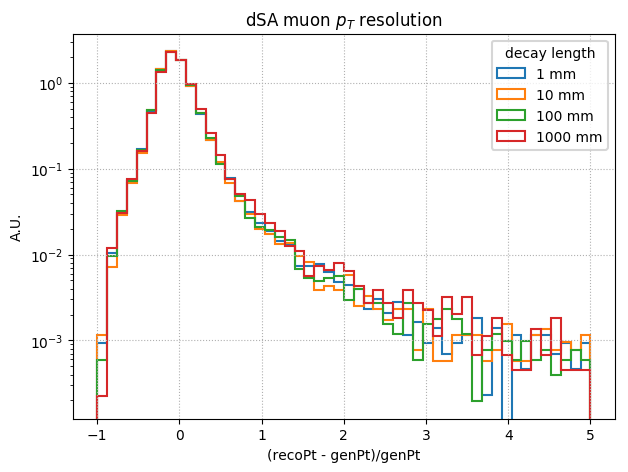

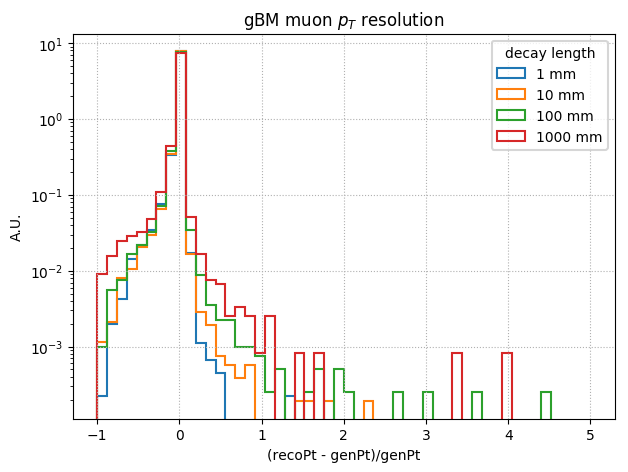

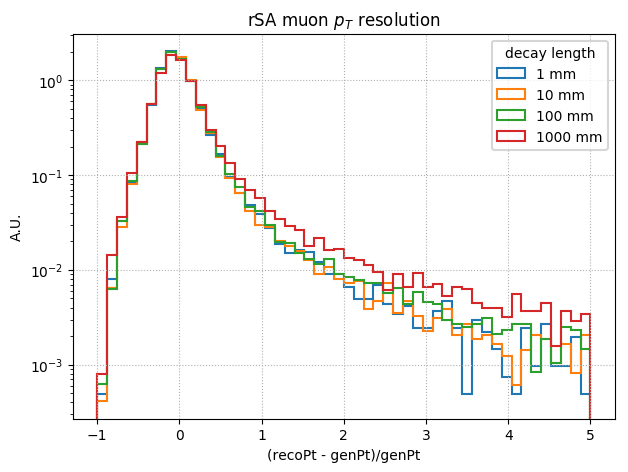

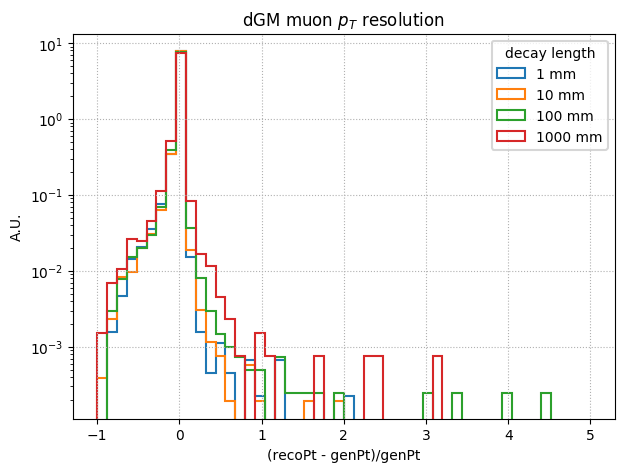

In [13]:
def make_res_plot(collection, name):

    fig,ax = plt.subplots(figsize=(7,5))
    # df = dfs[1]
    for k, df in collection.items():
        recoDf = df[['genPt', 'recoPt']].dropna()
        recoDf['reso'] = (recoDf['recoPt'] - recoDf['genPt']) / recoDf['genPt']
        recoDf['reso'].plot.hist(bins=50,range=(-1.,5), label='%d mm' % k, histtype='step',density=True)

    ax.set_title('%s muon $p_{T}$ resolution' % name)
    ax.set_xlabel('(recoPt - genPt)/genPt')
    ax.set_ylabel('A.U.')
    ax.set_yscale('log')
    ax.legend(loc='best', title='decay length')
    ax.grid()

    #plt.savefig("Mchi-%s_dMchi-%s/pt_res_%s.pdf" % (Mchi, dMchi, name.lower()))
    
make_res_plot(dfs_dsa, "dSA")
make_res_plot(dfs_gbm, "gBM")
make_res_plot(dfs_rsa, "rSA")
make_res_plot(dfs_dgm, "dGM")

# Leading gen MET vs sub-leading gen MET comparison



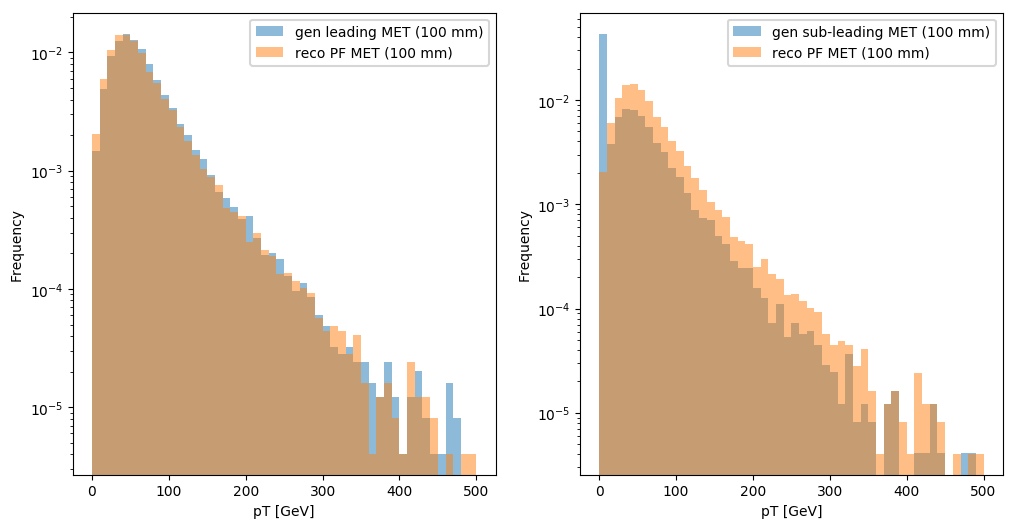

In [14]:
recoDf = dfs_dsa[100].dropna()
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].set_yscale('log', nonposy='clip')
recoDf['genLeadMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[0], label='gen leading MET (100 mm)', density=True)
recoDf['recoPFMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[0], label='reco PF MET (100 mm)', density=True)
axes[0].legend(loc='upper right')
axes[0].set_xlabel('pT [GeV]')
axes[1].set_xlabel('pT [GeV]')
axes[1].set_yscale('log', nonposy='clip')
recoDf['genSubLeadMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[1], label='gen sub-leading MET (100 mm)', density=True)
recoDf['recoPFMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[1], label='reco PF MET (100 mm)', density=True)
axes[1].legend(loc='upper right')
#normDf=(recoDf-recoDf.mean())/recoDf.std()
#recoDf['genLeadMetPt'].add(recoDf['genSubLeadMetPt']).plot.hist(bins=50,range=(0,500), alpha=0.5)
#recoDf['genSubLeadMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5)
#plt.savefig("Mchi-%s_dMchi-%s/lead_sublead_reco_MET_comp.pdf" % (Mchi, dMchi))

# Correlation between gen jet pT and MET gen/reco pT

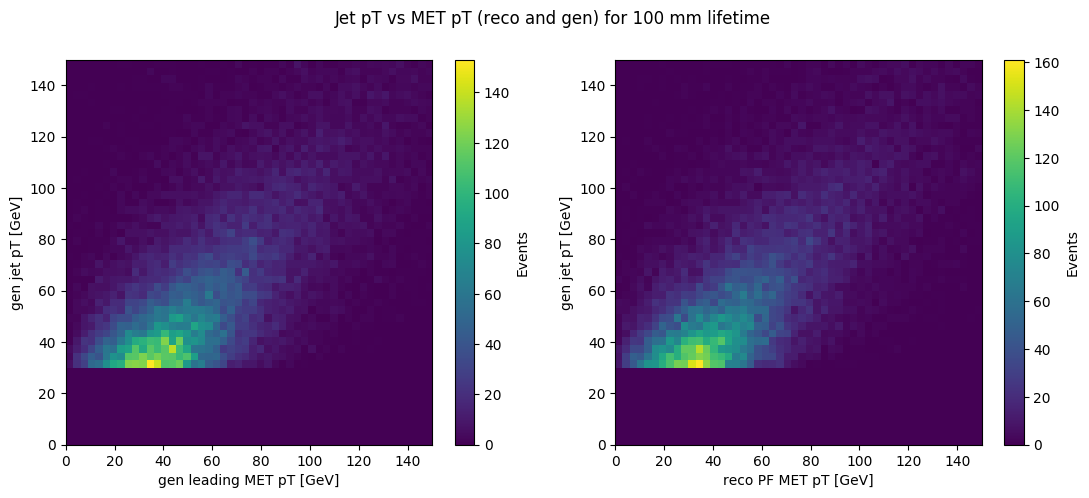

In [15]:
def make_jet_met_corr_plot(collection, ctau):

    fig, axes = plt.subplots(1,2, figsize=(13,5))
    fig.suptitle('Jet pT vs MET pT (reco and gen) for %d mm lifetime' % ctau)
    recoDf = collection[ctau][['nMatched','genPt','genEta','genPhi', 'genVxy', 'genJetPt', 'genLeadMetPt', 'genSubLeadMetPt', 'recoPFMetPt','recoPt']].dropna()
    #fig2, ax2 = plt.subplots(figsize=(10,8))
    #recoDf['nMatched'].plot.hist(bins=5, range=(0,5), ax=ax2)
    # recoDf['genLeadMetPt'].plot.hist(bins=50,range=(0,500))
    # recoDf['recoPFMetPt'].plot.hist(bins=50,range=(0,500))
    # recoDf['genSubLeadMetPt'].plot.hist(bins=50,range=(0,500))
    y = recoDf['genJetPt']
    x = recoDf['genLeadMetPt']
    p0 = axes[0].hist2d(x,y, bins=50, range=[[0,150],[0,150]])
    plt.colorbar(p0[3], ax=axes[0], label='Events')
    #plt.set_label('Events')
    axes[0].set_ylabel("gen jet pT [GeV]")
    axes[0].set_xlabel("gen leading MET pT [GeV]")

    x = recoDf['recoPFMetPt']
    p1 = axes[1].hist2d(x,y, bins=50, range=[[0,150],[0,150]])
    plt.colorbar(p1[3], ax=axes[1], label='Events')
    axes[1].set_ylabel("gen jet pT [GeV]")
    axes[1].set_xlabel("reco PF MET pT [GeV]")

    #plt.show()
    #plt.savefig("Mchi-%s_dMchi-%s/jet_met_corr_ctau-%d.pdf" % (Mchi, dMchi, ctau))

make_jet_met_corr_plot(dfs_dsa, 100)

# Efficiency vs gen jet pT and gen MET pT

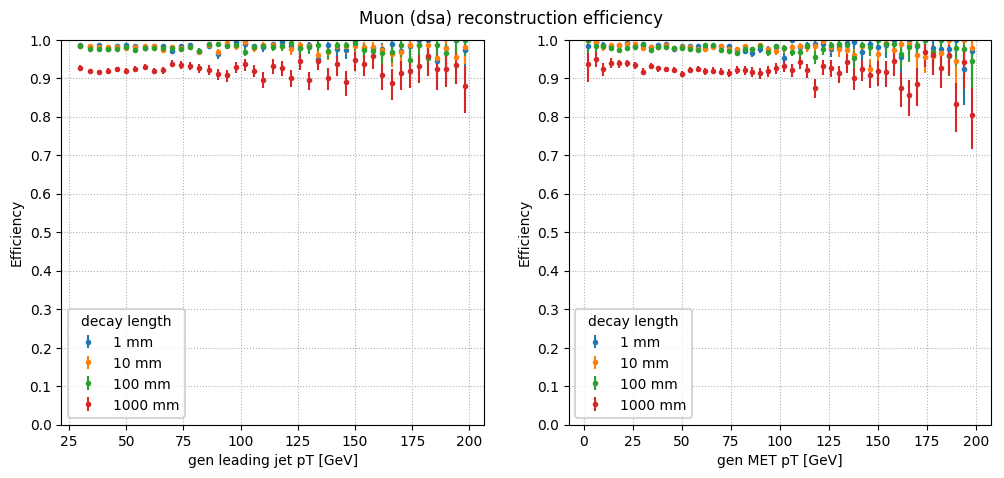

In [16]:
name = "dsa"
collection = dfs_dsa

fig,axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Muon (%s) reconstruction efficiency' % name, y=0.94)

all_mins = [0,0]
all_maxs = [200,200]
all_vars = ['genJetPt', 'genLeadMetPt', 'recoPt']
all_xlabels = ['gen leading jet pT [GeV]', 'gen MET pT [GeV]']

for i,ax in enumerate(fig.axes):
    curr_var = all_vars[i]
    for k, df in collection.items():
        recoDf = df[all_vars].dropna()
        make_plot(ax, k, df, recoDf, curr_var, 50, all_mins[i], all_maxs[i])

    ax.set_xlabel(all_xlabels[i])
    ax.set_ylabel('Efficiency')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_ylim((0,1))
    ax.legend(loc='best', title='decay length')
    ax.grid()

    #plt.savefig("Mchi-%s_dMchi-%s/jet_met_eff_%s.pdf" % (Mchi, dMchi, name))

<ErrorbarContainer object of 3 artists>

Warning in <TROOT::Append>: Replacing existing TH1: h0_10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1_10 (Potential memory leak).


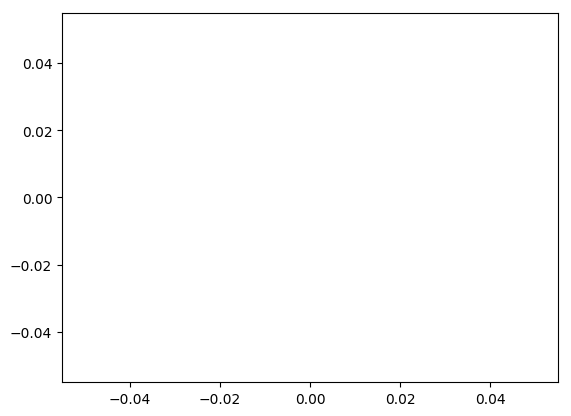

In [163]:
recodf2d = dfs_dsa[10][['genPt', 'genEta', 'genDr', 'recoPt', 'recoEta']].dropna()
h0 = ROOT.TH2F('h0_%d' % 10, '', 100, 0, 50, 100, -2.5, 2.5)
h1 = ROOT.TH2F('h1_%d' % 10, '', 100, 0, 50, 100, -2.5, 2.5)
# p0 = plt.hist2d(df['genPt'], df['genEta'], bins=50, range=[[0,60],[-3,3]])
# plt.colorbar(p0[3], label='Events')

# p1 = plt.hist2d(recodf2d['genPt'], recodf2d['genEta'], bins=50, range=[[0,60],[-3,3]])
# plt.colorbar(p1[3], label='Events')

import numbers

# for (i, x) in enumerate(dfs_dsa[10]['genPt']):
#     h0.Fill(dfs_dsa[10]['genPt'][i/2][i%2], dfs_dsa[10]['genEta'][i/2][i%2])
for i, j in zip(dfs_dsa[10]['genPt'], dfs_dsa[10]['genEta']):
    h0.Fill(i,j)

for i, j in zip(recodf2d['genPt'], recodf2d['genEta']):
    h1.Fill(i,j)
#     print("len pt: %d, len eta: %d" % (len(dfs_dsa[10]['genPt'][i]), len(dfs_dsa[10]['genEta'][i])))
#     h0.Fill(dfs_dsa[10]['genPt'][i], dfs_dsa[10]['genEta'][i])
#     if len(dfs_dsa[10]['genEta'][i]) > 1:
#         h0.Fill(dfs_dsa[10]['genPt'][i][1], dfs_dsa[10]['genEta'][i][1])
# for (i, x) in enumerate(dfs_dsa[10]['genPt']) :
#     h0.Fill(x, dfs_dsa[10]['genEta'][i])

# for x in recodf2d['genPt']: 
#     for y in recodf2d['genEta']:
#         h1.Fill(x, y)
        
eff = ROOT.TEfficiency(h1, h0)

data = extract_teffi(eff)
plt.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label='%d mm' % 10, markersize=3)

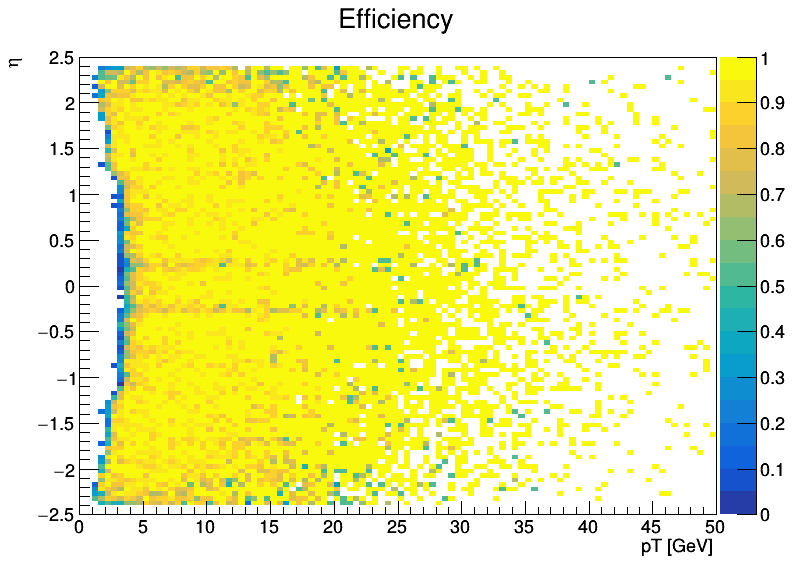

In [164]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h0.GetXaxis().SetTitle("pT [GeV]")
h0.GetYaxis().SetTitle("#eta")
h0.GetZaxis().SetTitle("Efficiency")
eff = ROOT.TEfficiency(h1, h0)
eff.SetTitle("Efficiency")
eff.Draw("COLZ")
c.Draw()

Text(0,0.5,'$\\eta$')

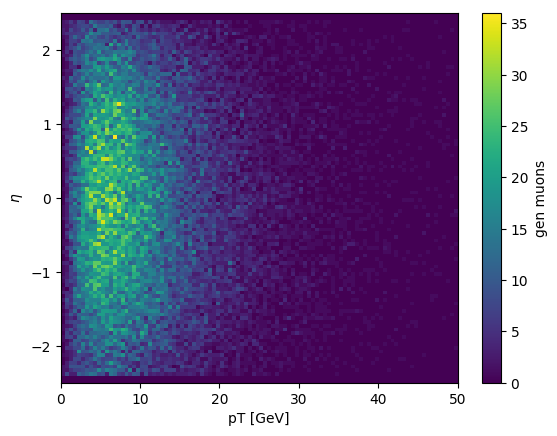

In [165]:
p0 = plt.hist2d(df['genPt'], df['genEta'], bins=100, range=[[0,50],[-2.5,2.5]])
plt.colorbar(p0[3], label='gen muons')
plt.xlabel("pT [GeV]")
plt.ylabel("$\eta$")

Text(0,0.5,'$\\eta$')

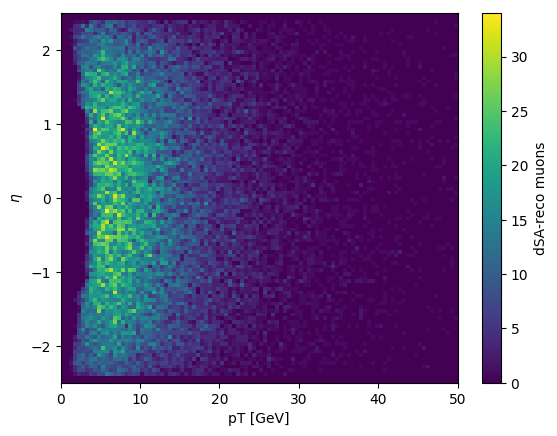

In [141]:
p1 = plt.hist2d(recodf2d['genPt'], recodf2d['genEta'], bins=100, range=[[0,50],[-2.5,2.5]])
plt.colorbar(p1[3], label='dSA-reco muons')
plt.xlabel("pT [GeV]")
plt.ylabel("$\eta$")

Text(0,0.5,'dR')

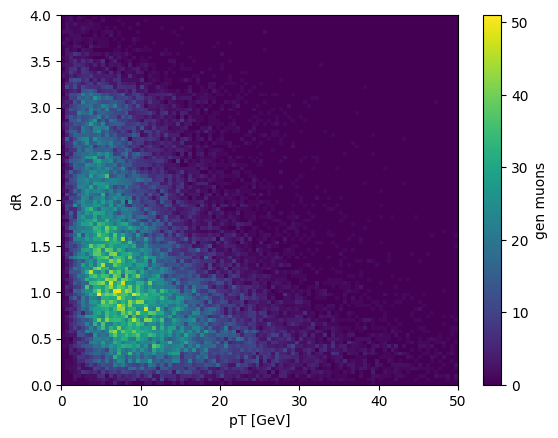

In [159]:
p1 = plt.hist2d(dfs_dsa[10]['genPt'], dfs_dsa[10]['genDr'], bins=100, range=[[0,50],[0,4.0]])
plt.colorbar(p1[3], label='gen muons')
plt.xlabel("pT [GeV]")
plt.ylabel("dR")

Text(0,0.5,'dR')

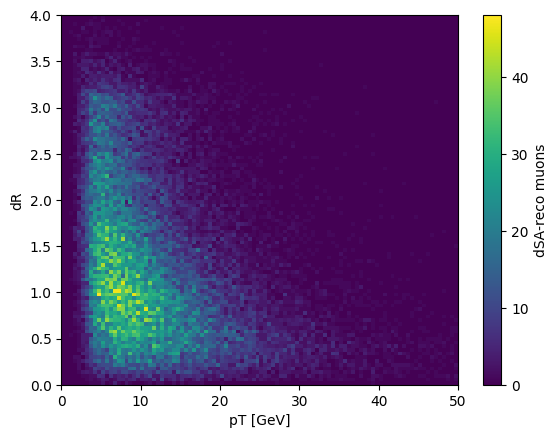

In [160]:
p1 = plt.hist2d(recodf2d['genPt'], recodf2d['genDr'], bins=100, range=[[0,50],[0,4.0]])
plt.colorbar(p1[3], label='dSA-reco muons')
plt.xlabel("pT [GeV]")
plt.ylabel("dR")

Warning in <TROOT::Append>: Replacing existing TH1: h2_10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3_10 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: drvspteff


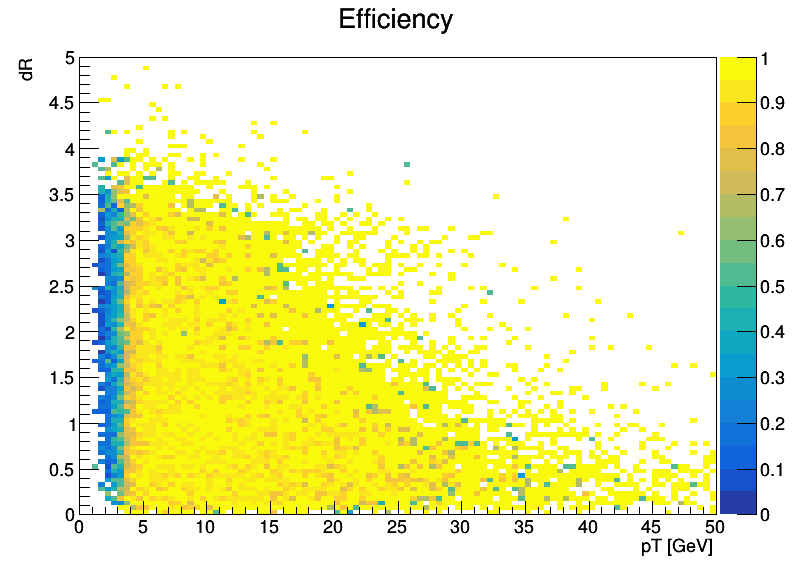

In [172]:
h2 = ROOT.TH2F('h2_%d' % 10, '', 100, 0, 50, 100, 0, 5)
h3 = ROOT.TH2F('h3_%d' % 10, '', 100, 0, 50, 100, 0, 5)
for i, j in zip(dfs_dsa[10]['genPt'], dfs_dsa[10]['genDr']):
    h2.Fill(i,j)
for i, j in zip(recodf2d['genPt'], recodf2d['genDr']):
    h3.Fill(i,j)
c = ROOT.TCanvas("drvspteff","",800,600)
c.Draw()
h2.GetXaxis().SetTitle("pT [GeV]")
h2.GetYaxis().SetTitle("dR")
h2.GetZaxis().SetTitle("Efficiency")
eff2 = ROOT.TEfficiency(h3, h2)
eff2.SetTitle("Efficiency")
eff2.Draw("COLZ")

In [173]:
print "ss"

ss
